## Importing important Libraries

In [1]:
# !pip install numpy==1.24.4 scikit-learn==1.2.2 joblib==1.2.0
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

## Reading the data using pandas

In [2]:
data = pd.read_csv('/content/train (1).csv')

## VISUALIZING DATASET

In [3]:
data.head(10)

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no
5,2009-05-07,25,entrepreneur,single,tertiary,no,140,yes,no,cellular,348,1,-1,0,NaN,no
6,2009-05-15,46,blue-collar,married,secondary,no,668,yes,no,NaN,1263,2,-1,0,NaN,yes
7,2010-05-08,37,admin.,married,secondary,no,14,yes,no,NaN,176,2,-1,0,NaN,no
8,2008-12-13,38,unemployed,divorced,primary,yes,14123,yes,yes,cellular,2370,4,852,4,other,no
9,2010-05-21,31,technician,married,secondary,no,589,yes,yes,NaN,151,1,-1,0,NaN,no


## DESCRIPTIVE STATISTICS

In [4]:
data.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


# EDA

1 last contact date: last contact date

2 age (numeric)

3 job : type of job

4 marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

5 education (categorical: "unknown","secondary","primary","tertiary")

6 default: has credit in default? (binary: "yes","no")

7 balance: average yearly balance, in euros (numeric)

8 housing: has housing loan? (binary: "yes","no")

9 loan: has personal loan? (binary: "yes","no")

10 contact: contact communication type (categorical: "unknown","telephone","cellular")

11 duration: last contact duration, in seconds (numeric)

12 campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

14 previous: number of contacts performed before this campaign and for this client (numeric)

15 poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):

16 target: has the client subscribed a term deposit? (binary: "yes","no")

## Histogram for all the numerical features to know the distribution

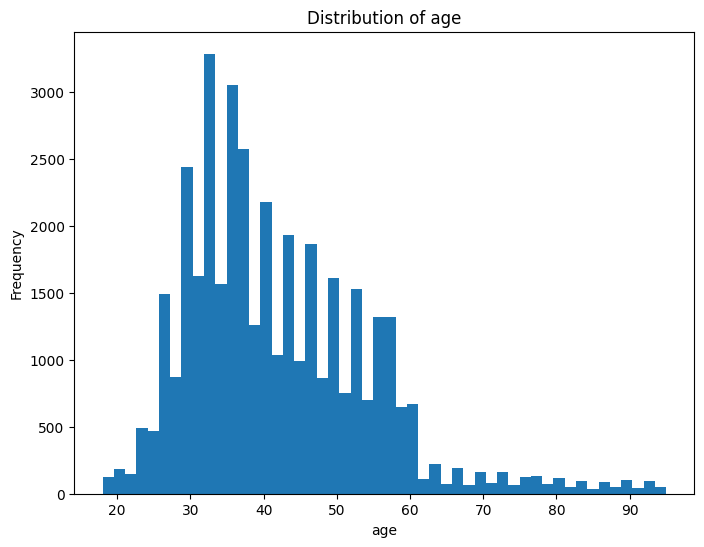

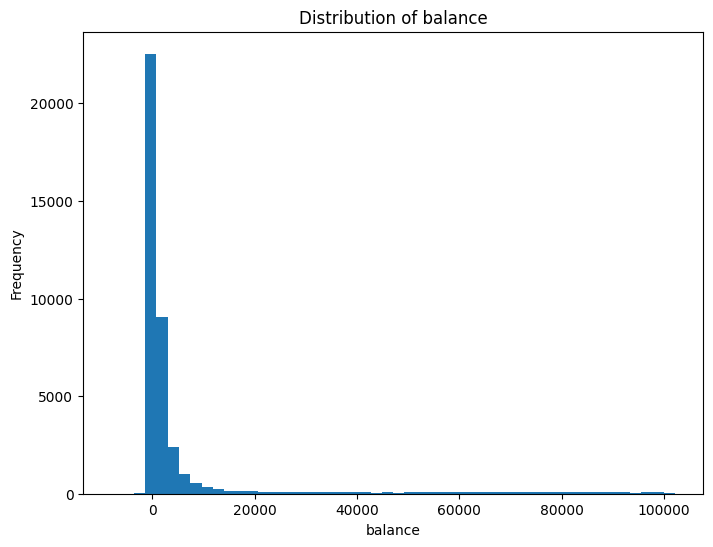

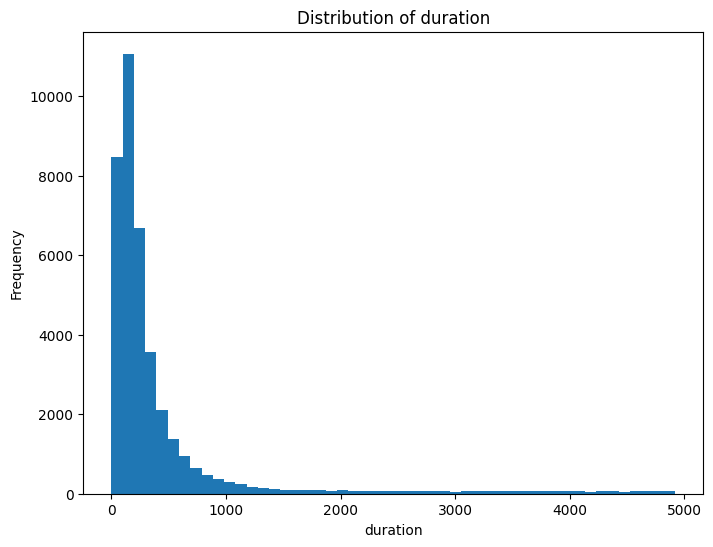

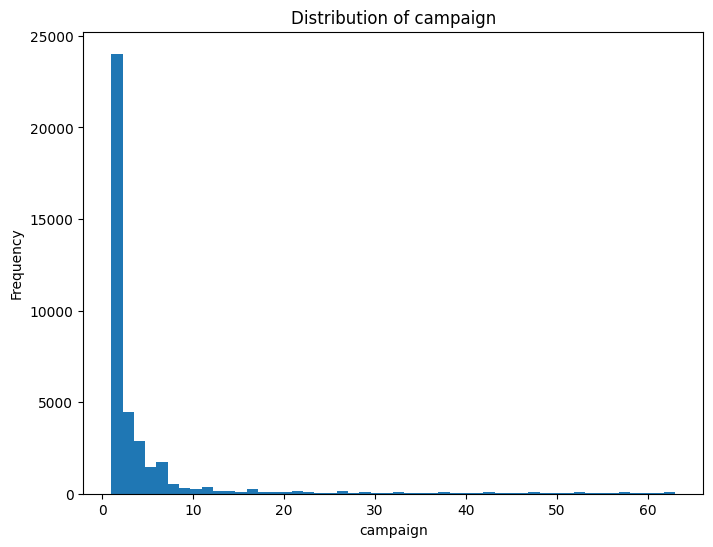

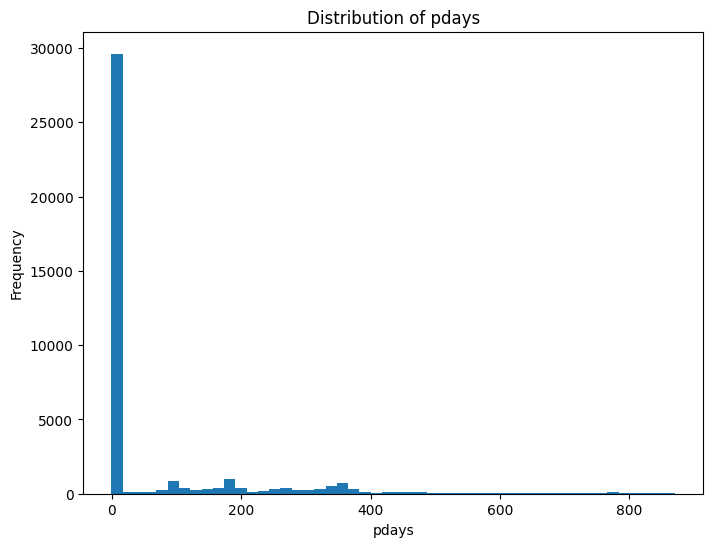

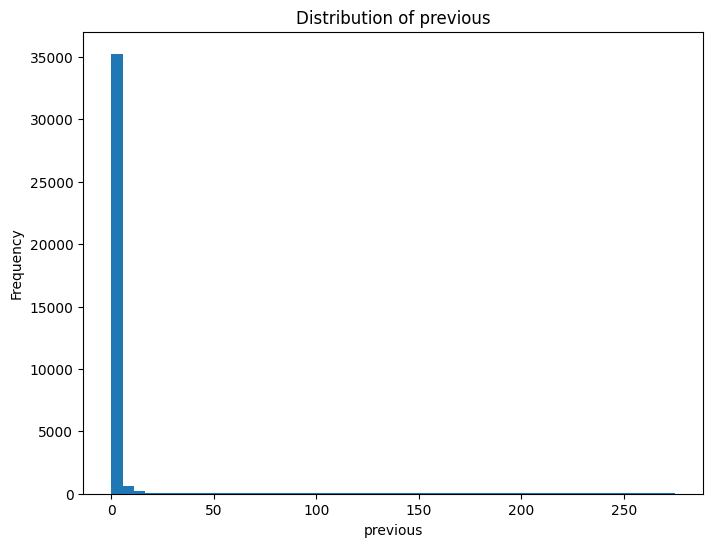

In [5]:
# Plotting histograms for all numerical features
numerical_features = data.select_dtypes(include=np.number).columns.tolist()

for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  plt.hist(data[feature], bins=50)
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {feature}')
  plt.show()

## Visualizing outliers using boxplot

In [6]:
numerical_features

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

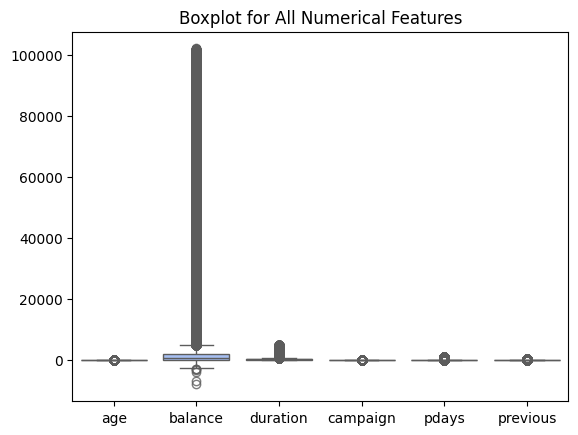

In [7]:
sns.boxplot(data=data[numerical_features],palette='coolwarm',
    flierprops=dict(marker='o', color='red', markersize=6, alpha=0.8))
plt.title('Boxplot for All Numerical Features')
plt.show()

## Removing Outliers from numerical features using z-score(removing the data which is more than 2 sigma)

In [8]:
from scipy.stats import zscore

num_N_features = ['age','pdays', 'previous']
for feature in num_N_features:
    # Compute Z-scores for the current feature
    z_scores = zscore(data[feature])

    # Identify outliers where Z-score > 3 or < -3
    outliers = np.where(np.abs(z_scores) > 2)[0]
    print(f"Outliers detected in {feature}:")
    print(data.iloc[outliers])

    # Remove outliers
    data = data[np.abs(z_scores) <= 2]  # Keep only non-outlier rows

# The cleaned data without outliers
data_cleaned = data

Outliers detected in age:
      last contact date  age           job   marital  education default  \
19           2009-10-30   86       student  divorced    primary     yes   
106          2010-10-13   83       retired    single    primary      no   
160          2010-03-09   80  entrepreneur   married  secondary     yes   
167          2009-08-12   76       retired  divorced    primary      no   
213          2009-03-02   93     housemaid    single  secondary      no   
...                 ...  ...           ...       ...        ...     ...   
39143        2008-10-20   77       retired   married        NaN      no   
39145        2010-03-25   68     housemaid   married    primary      no   
39147        2008-12-01   91    unemployed  divorced    primary     yes   
39149        2008-12-17   86  entrepreneur  divorced   tertiary      no   
39176        2010-02-25   70    management   married  secondary      no   

       balance housing loan    contact  duration  campaign  pdays  previo

## Removing Outliers from numerical features using InterQuartile range

In [9]:
# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, feature):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define the upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and remove outliers
    cleaned_data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
    return cleaned_data

# Example: Remove outliers for specific numerical features
num_features = ['balance','campaign','duration']  # Replace with your actual feature names
for feature in num_features:
    print(f"Removing outliers in {feature}...")
    data = remove_outliers_iqr(data, feature)

# The cleaned data without outliers
data_cleaned = data

Removing outliers in balance...
Removing outliers in campaign...
Removing outliers in duration...


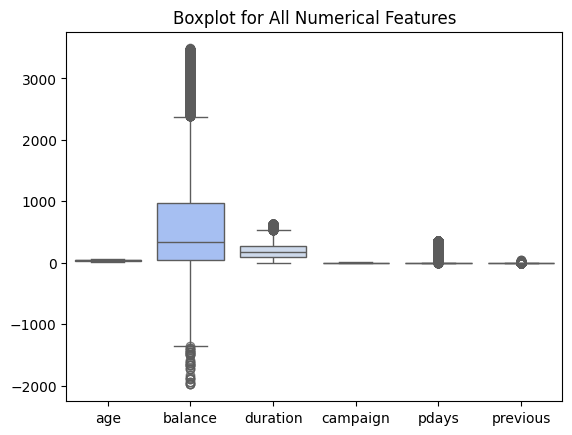

In [10]:
sns.boxplot(data=data_cleaned[numerical_features],palette='coolwarm',
    flierprops=dict(marker='o', color='red', markersize=6, alpha=0.8))
plt.title('Boxplot for All Numerical Features')
plt.show()

In [11]:
# data_cleaned = data.select_dtypes(include=np.number).columns.tolist()

# for feature in data_cleaned:
#   plt.figure(figsize=(8, 6))
#   plt.hist(data[feature], bins=50)
#   plt.xlabel(feature)
#   plt.ylabel('Frequency')
#   plt.title(f'Distribution of {feature}')
#   plt.show()

In [12]:
data_cleaned.describe()

,age,balance,duration,campaign,pdays,previous
count,26778.000000,26778.000000,26778.000000,26778.000000,26778.000000,26778.000000
mean,40.192658,638.804093,205.862723,2.135522,32.348010,0.516319
std,9.846583,846.161305,137.639214,1.316954,84.178824,1.773138
min,18.000000,-1980.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,45.000000,102.000000,1.000000,-1.000000,0.000000
50%,39.000000,346.000000,171.000000,2.000000,-1.000000,0.000000
75%,48.000000,979.000000,277.000000,3.000000,-1.000000,0.000000
max,67.000000,3487.000000,634.000000,6.000000,353.000000,51.000000


## Plotting Bar chart for categorical variables

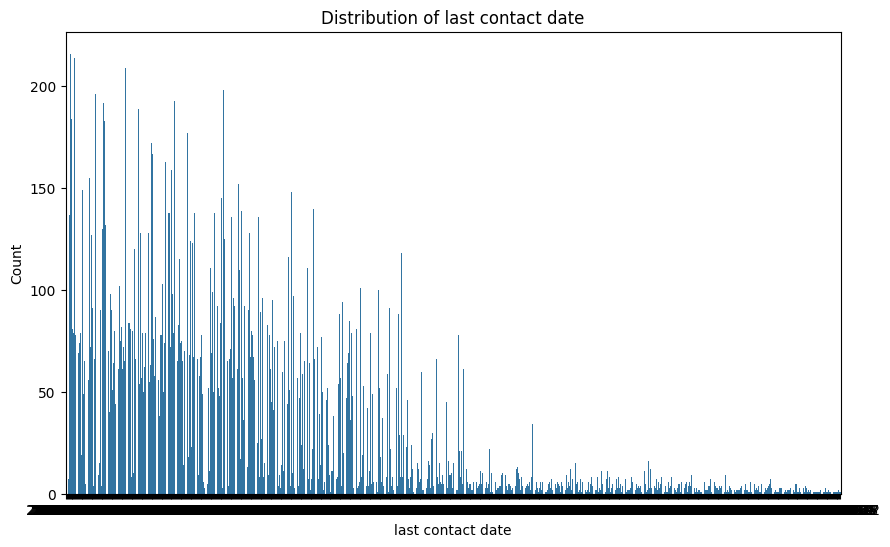

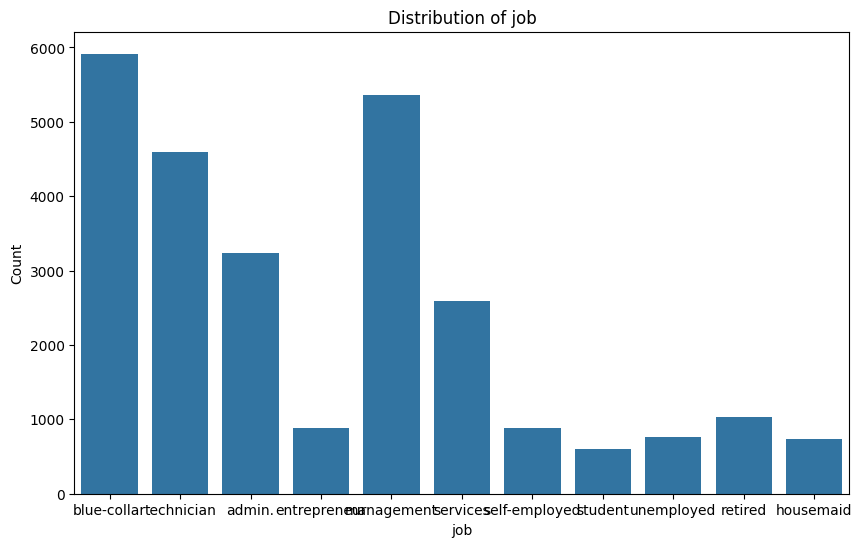

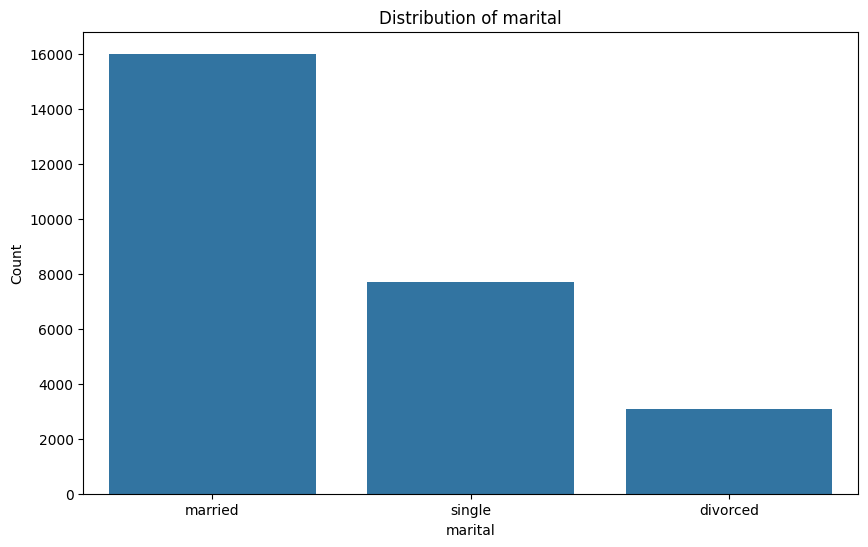

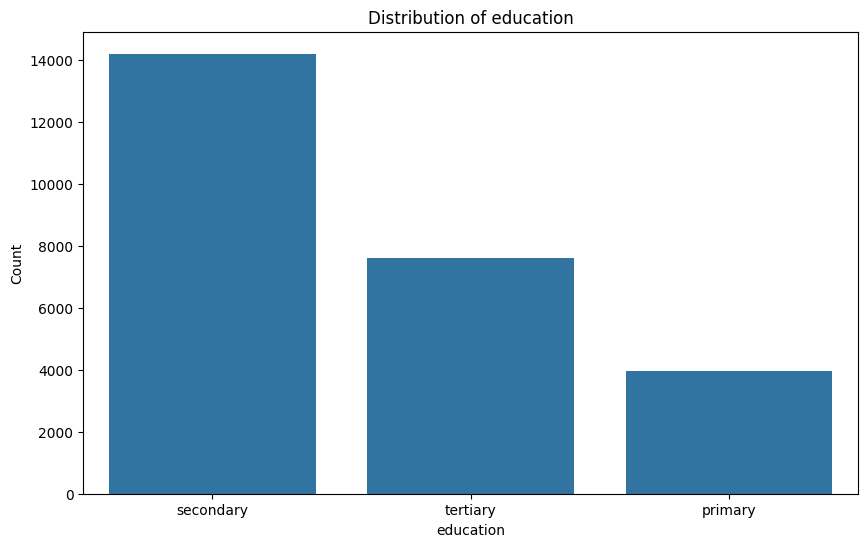

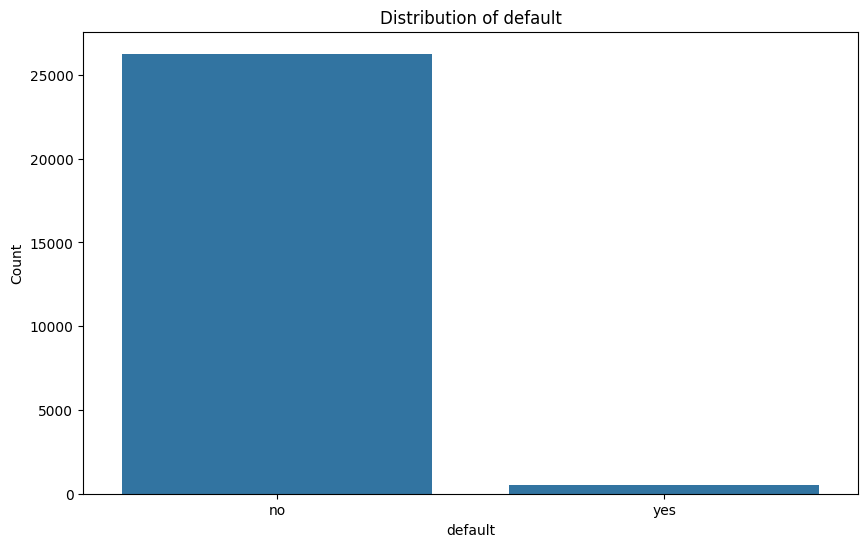

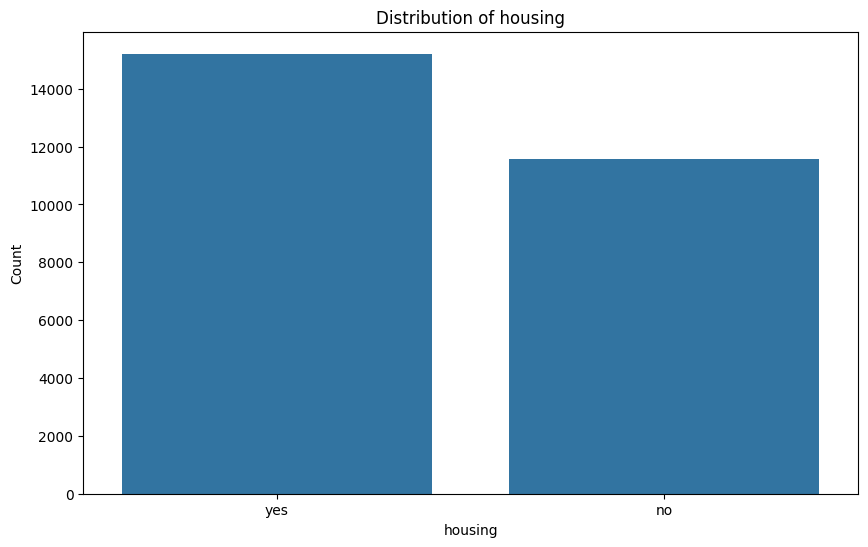

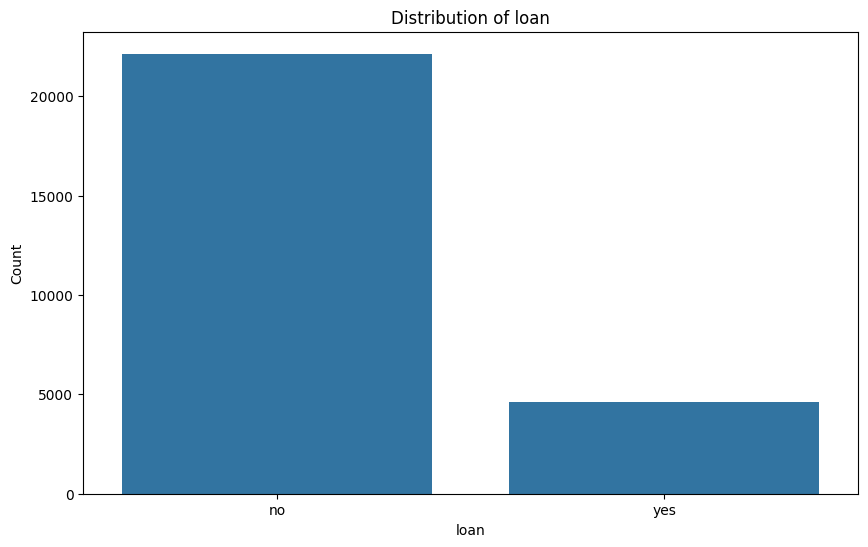

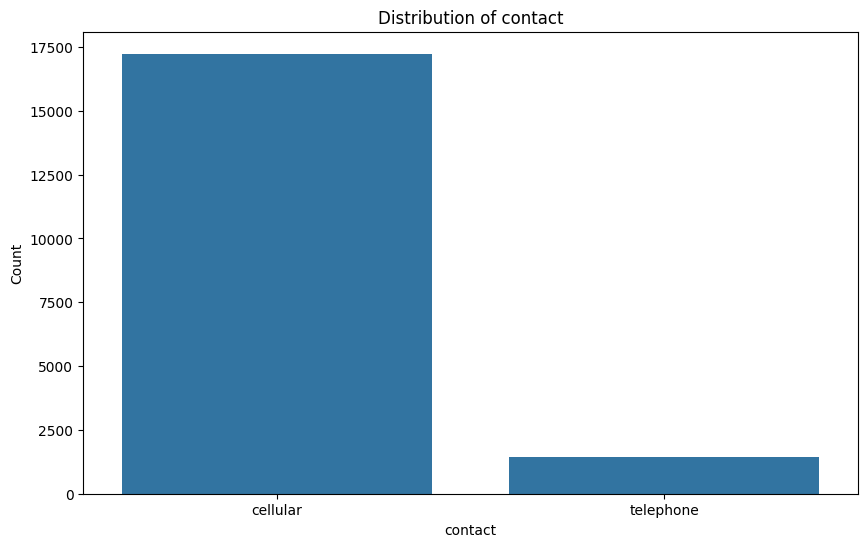

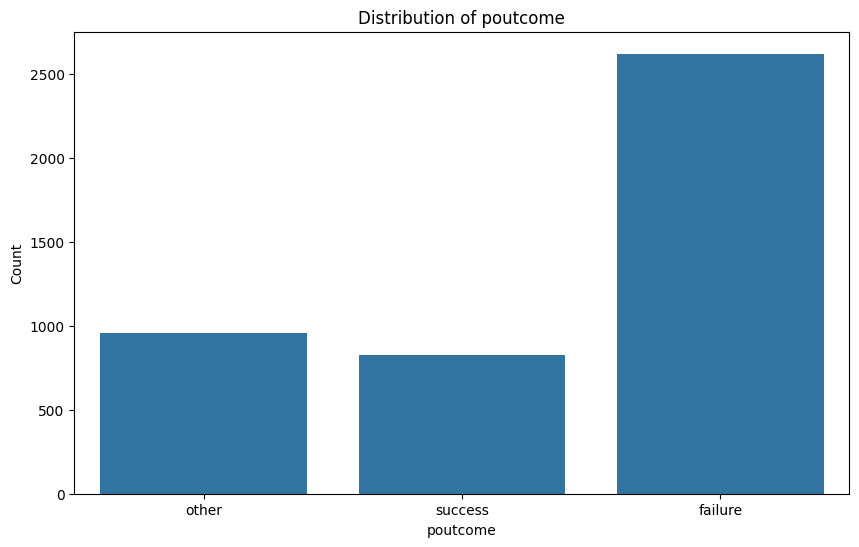

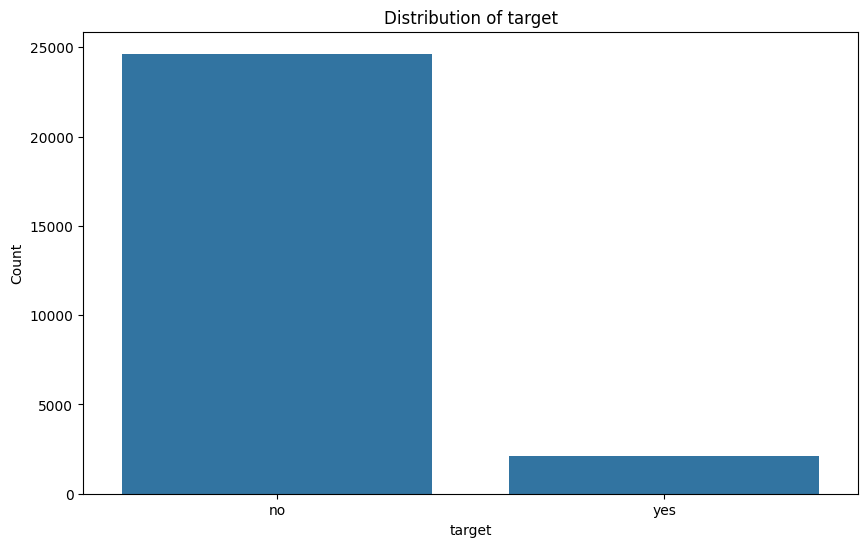

In [13]:
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

for feature in categorical_features:
    if feature in data.columns and not data[feature].isna().all():
        plt.figure(figsize=(10, 6))
        sns.countplot(x=feature, data=data)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.title(f'Distribution of {feature}')
        plt.show()
    else:
        print(f"Skipping feature {feature}: Either not in DataFrame or contains all NaN values.")

## Data after cleaning

In [14]:
df=data_cleaned

In [15]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 26778 entries, 0 to 39205
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  26778 non-null  object
 1   age                26778 non-null  int64 
 2   job                26620 non-null  object
 3   marital            26778 non-null  object
 4   education          25744 non-null  object
 5   default            26778 non-null  object
 6   balance            26778 non-null  int64 
 7   housing            26778 non-null  object
 8   loan               26778 non-null  object
 9   contact            18675 non-null  object
 10  duration           26778 non-null  int64 
 11  campaign           26778 non-null  int64 
 12  pdays              26778 non-null  int64 
 13  previous           26778 non-null  int64 
 14  poutcome           4407 non-null   object
 15  target             26778 non-null  object
dtypes: int64(6), object(10)
memory usage: 3.5+ MB

None

### Detecting Null values

In [16]:
df.isnull().sum()

,0
last contact date,0
age,0
job,158
marital,0
education,1034
default,0
balance,0
housing,0
loan,0
contact,8103


In [17]:
df.head(10)

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no
5,2009-05-07,25,entrepreneur,single,tertiary,no,140,yes,no,cellular,348,1,-1,0,NaN,no
7,2010-05-08,37,admin.,married,secondary,no,14,yes,no,NaN,176,2,-1,0,NaN,no
9,2010-05-21,31,technician,married,secondary,no,589,yes,yes,NaN,151,1,-1,0,NaN,no
10,2008-08-19,32,management,single,tertiary,no,1625,yes,no,cellular,451,6,-1,0,NaN,no
11,2009-05-15,46,management,single,secondary,no,244,yes,no,NaN,244,1,-1,0,NaN,no


In [18]:
df.describe()

,age,balance,duration,campaign,pdays,previous
count,26778.000000,26778.000000,26778.000000,26778.000000,26778.000000,26778.000000
mean,40.192658,638.804093,205.862723,2.135522,32.348010,0.516319
std,9.846583,846.161305,137.639214,1.316954,84.178824,1.773138
min,18.000000,-1980.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,45.000000,102.000000,1.000000,-1.000000,0.000000
50%,39.000000,346.000000,171.000000,2.000000,-1.000000,0.000000
75%,48.000000,979.000000,277.000000,3.000000,-1.000000,0.000000
max,67.000000,3487.000000,634.000000,6.000000,353.000000,51.000000


## Plotting heatmap (correlation matrix) to check the correlation between features

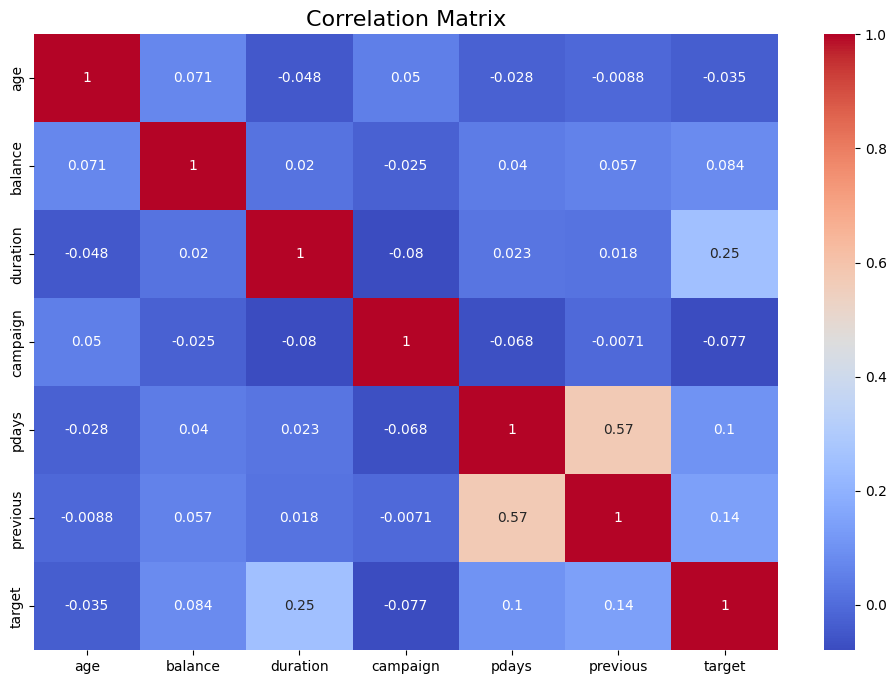

In [19]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
fig = plt.figure(figsize=(12,8))
df['target'] = LabelEncoder().fit_transform(df['target'])



# Separate both dataframes into
numeric_df = df.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()


sns.heatmap(corr_numeric, cbar=True,annot=True, cmap="coolwarm")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [20]:
numerical_cols = df.select_dtypes(include=['number']).columns
print("Numerical columns:", numerical_cols)

object_cols = df.select_dtypes(include=['object']).columns
print("Object columns:", object_cols)


Numerical columns: Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'target'],
      dtype='object')
Object columns: Index(['last contact date', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'poutcome'],
      dtype='object')


In [21]:
df = df.drop(columns=['last contact date'])

## Implemented a pipeline

### 1. Numerical pipeline ( for imputing and scaling)
### 2. categorical pipeline ( for imputing and encoding categorical variables using one hot)
### 3. preprocessing pipeline is the main pipeline from where my numerical data goes to numerical pipeline and categorical data goes to categorical pipeline.

## importing smote as the target data is so much imbalanced

In [22]:
# !pip install imbalanced-learn
from imblearn.over_sampling import SMOTE


In [23]:
# Define the numerical and categorical columns
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'previous']
categorical_columns = ['marital', 'default', 'housing', 'loan']

# Define the preprocessing steps for numerical and categorical data
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # Impute missing values with the most frequent value
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# Combine both pipelines using ColumnTransformer
preprocessing_pipeline = ColumnTransformer([
    ('num', numerical_pipeline, numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
])


# Split data into training and testing sets
X = df.drop('target', axis=1)  # Features
y = df['target']               # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the encoder to your target variable and transform it
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
X_train_transformed = preprocessing_pipeline.fit_transform(X_train)

# Transform X_test using the already fitted pipeline
X_test_transformed = preprocessing_pipeline.transform(X_test)

In [24]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
19966,42,retired,married,secondary,no,56,yes,no,NaN,215,1,-1,0,NaN
26329,50,housemaid,married,secondary,no,0,yes,no,cellular,160,1,-1,0,NaN
17886,47,technician,married,secondary,no,338,no,yes,cellular,344,2,-1,0,NaN
13124,40,management,married,tertiary,no,1734,yes,no,NaN,169,1,-1,0,NaN
3605,37,technician,divorced,tertiary,no,39,no,no,cellular,74,3,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31644,56,retired,divorced,secondary,no,212,no,yes,telephone,27,1,-1,0,NaN
7956,31,management,married,tertiary,yes,-1038,yes,no,cellular,255,2,-1,0,NaN
1256,55,unemployed,divorced,primary,no,-53,no,no,telephone,225,4,6,3,other
23017,34,blue-collar,single,secondary,yes,-947,yes,no,NaN,211,3,-1,0,NaN


In [25]:
X_train_transformed.shape

(21422, 14)

### Used SMOTE as we have imbalanced target variable (as one class has significantly fewer samples than the other)

In [26]:
smote = SMOTE(random_state=45)
X_train_transformed_smote, y_train_transformed = smote.fit_resample(X_train_transformed, y_train)

### After using smote size of training data increases to double

In [27]:
X_train_transformed_smote.shape

(39426, 14)

In [28]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

## Implemented the random forest model using pipeline( in which preprocessing pipeline is also there)

In [30]:
#  pipeline with a classifier
pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('classifier', RandomForestClassifier(random_state=42))
])


# Train the model using cross-validation
pipeline.fit(X_train, y_train)

# Evaluate the model
cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", cross_val_scores)
print("Mean cross-validation accuracy:", cross_val_scores.mean())

# Test set evaluation
test_score = pipeline.score(X_test, y_test)
print("Test set accuracy:", test_score)

Cross-validation accuracy scores: [0.92112019 0.91878646 0.92040149 0.92250233 0.91736695]
Mean cross-validation accuracy: 0.9200354852170352
Test set accuracy: 0.9232636295743092


In [37]:
import pickle
from joblib import dump
dump(pipeline, 'model.joblib')

['model.joblib']

## Hyper Parametertunning for random forest

In [31]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report

# # Define the parameter grid for RandomForestClassifier
# param_grid = {
#     'n_estimators': [50, 100,150,200],
#     'max_depth': [None,4,5,6,7,8],
#     'min_samples_split': [2, 5, 7],
#     # 'classifier__min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None]
# }

# rfe = RandomForestClassifier(random_state=42)
# # Set up GridSearchCV with the pipeline
# grid_search = GridSearchCV(
#     estimator=rfe,
#     param_grid=param_grid,
#     cv=5,  # 5-fold cross-validation
#     scoring='accuracy',
#     verbose=1,
#     n_jobs=-1  # Use all available CPU cores
# )

# grid_search.fit(X_train_transformed, y_train)

# # Display the best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validation Accuracy:", grid_search.best_score_)
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test_transformed)

# # # Evaluate the model
# print("Test Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:")
# print(classification_report(y_test, y_pred))
# Perform Grid Search
# grid_search.fit(X_train, y_train)

# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Cross-Validation Accuracy:", best_score)

# # Use the best model to make predictions
# best_model = grid_search.best_estimator_
# result = best_model.predict(dt)
# print("Prediction Result:", result)

## Following metrics are used to know the model performance

### (i) Accuracy - To know overall correctness ((Tp+Tn)/(tp+tn+fp+fn))
### (ii) F1 Score - Balance precision and recall
### (iii) Precision - Proportion of true positive among all positive prediction
### (iv) Recall - Proportion of true positives among all actual positive instances

### Parameter got by tuning random forest model =  'max_depth': 7, 'max_feature ='sqrt'

Model: Random Forest
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      4929
           1       0.76      0.04      0.07       427

    accuracy                           0.92      5356
   macro avg       0.84      0.52      0.52      5356
weighted avg       0.91      0.92      0.89      5356





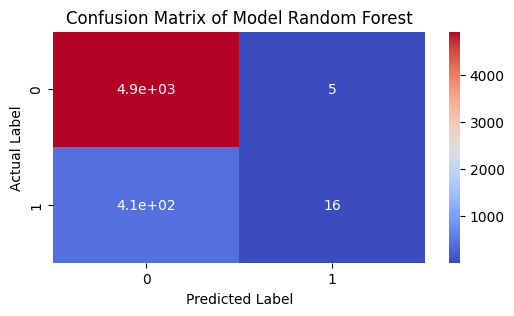

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4929
           1       0.42      0.09      0.15       427

    accuracy                           0.92      5356
   macro avg       0.67      0.54      0.55      5356
weighted avg       0.89      0.92      0.89      5356





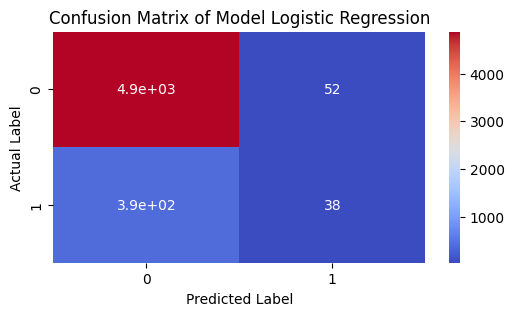

Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      4929
           1       0.58      0.24      0.34       427

    accuracy                           0.93      5356
   macro avg       0.76      0.61      0.65      5356
weighted avg       0.91      0.93      0.91      5356





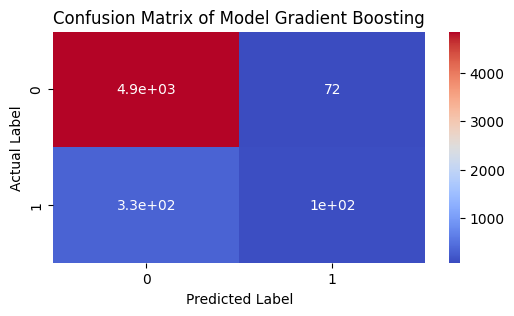

Model: XGB 
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      4929
           1       0.62      0.23      0.34       427

    accuracy                           0.93      5356
   macro avg       0.78      0.61      0.65      5356
weighted avg       0.91      0.93      0.91      5356





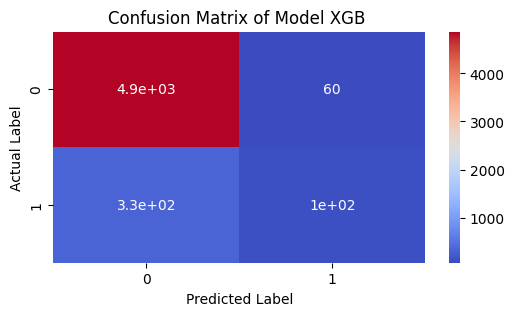

Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
0        Random Forest  0.922330   0.761905  0.037471  0.071429
1  Logistic Regression  0.917662   0.422222  0.088993  0.147002
2    Gradient Boosting  0.925691   0.583815  0.236534  0.336667
3                 XGB   0.927745   0.625000  0.234192  0.340716


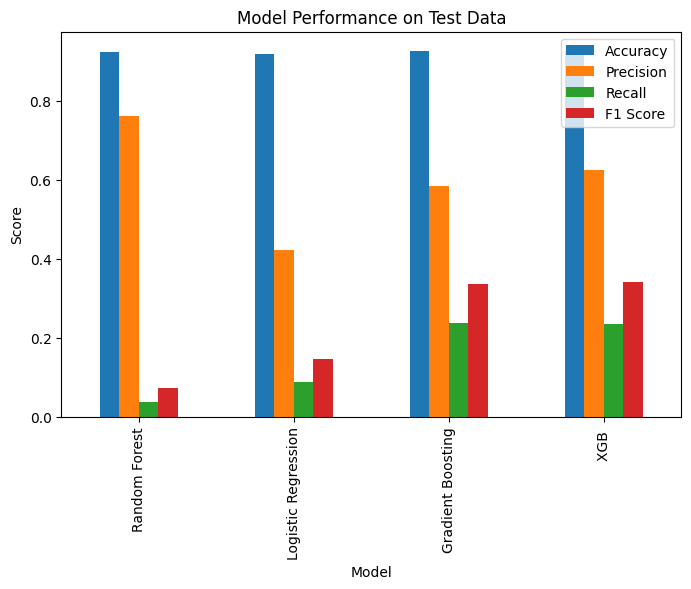

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV


models = {
    'Random Forest': RandomForestClassifier(random_state=42,max_depth=7, max_features='sqrt'),
    # 'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGB ': XGBClassifier( n_estimators= 150, min_child_weight= 11, max_depth= 5, learning_rate= 0.06),
    # 'MLP': MLPClassifier(alpha= 0.01, hidden_layer_sizes = (100, 50)),

}
#subsample=0.8,gamma= 0, colsample_bytree= 0.6
performance_metrics = []

for name, model in models.items():
    # Fit the model on optimal features
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    # y_proba = model.predict_proba(X_test_transformed)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    performance_metrics.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    })

    # Print classification report for each model
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("\n")

    matrix = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(6,3))
    sns.heatmap(matrix,annot=True,cmap="coolwarm")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(f"Confusion Matrix of Model {name}")
    plt.show()

# Display and analyze model performance
performance_df = pd.DataFrame(performance_metrics)
print("Model Performance Comparison:")
print(performance_df)

# Visualize model performance metrics
performance_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', figsize=(8, 5))
plt.title('Model Performance on Test Data')
plt.ylabel('Score')
plt.show()

## Training the model after balancing the target variable using smote as there are very few examples for 0

In [39]:
import pickle
from joblib import dump
dump(models['Random Forest'], 'models.joblib')

['models.joblib']

In [33]:
# models = {
#     # 'Random Forest': RandomForestClassifier(random_state=42,max_depth=7, max_features='sqrt'),
#     # 'Random Forest': RandomForestClassifier(random_state=42),
#     # 'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
#     # 'Gradient Boosting': GradientBoostingClassifier(random_state=42),
#     'XGB ': XGBClassifier( n_estimators= 150, min_child_weight= 11, max_depth= 5, learning_rate= 0.06),
#     # 'MLP': MLPClassifier(alpha= 0.01, hidden_layer_sizes = (100, 50)),

# }
# #subsample=0.8,gamma= 0, colsample_bytree= 0.6
# performance_metrics = []

# for name, model in models.items():
#     # Fit the model on optimal features
#     model.fit(X_train_transformed_smote, y_train_transformed)
#     y_pred = model.predict(X_test_transformed)
#     # y_proba = model.predict_proba(X_test_transformed)[:, 1] if hasattr(model, "predict_proba") else None

#     # Calculate performance metrics
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)

#     performance_metrics.append({
#         'Model': name,
#         'Accuracy': accuracy,
#         'Precision': precision,
#         'Recall': recall,
#         'F1 Score': f1,
#     })

#     # Print classification report for each model
#     print(f"Model: {name}")
#     print(classification_report(y_test, y_pred))
#     print("\n")

#     matrix = confusion_matrix(y_test,y_pred)
#     plt.figure(figsize=(6,3))
#     sns.heatmap(matrix,annot=True,cmap="coolwarm")
#     plt.xlabel("Predicted Label")
#     plt.ylabel("Actual Label")
#     plt.title(f"Confusion Matrix of Model {name}")
#     plt.show()

# # Display and analyze model performance
# performance_df = pd.DataFrame(performance_metrics)
# print("Model Performance Comparison:")
# print(performance_df)

# Visualize model performance metrics
# performance_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', figsize=(8, 5))
# plt.title('Model Performance on Test Data')
# plt.ylabel('Score')
# plt.show()

## Hyperparameter Tunning of XGB classifier

In [34]:
# from sklearn.model_selection import RandomizedSearchCV
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # Initialize XGBoost Classifier
# model = XGBClassifier(random_state=42)

# # Define the parameter grid
# param_grid = {
#     'n_estimators': np.arange(50, 300, 50),
#     'learning_rate': np.arange(0.01,1,0.05),
#     'max_depth': np.arange(3, 10,1),
#     'min_child_weight': np.arange(3,12,2),
#     # 'subsample': [0.6, 0.8, 1.0],
#     # 'colsample_bytree': [0.6, 0.8, 1.0],
#     # 'gamma': [0, 0.1, 0.2, 0.3],
#     # 'reg_alpha': [0, 0.01, 0.1, 1],
#     # 'reg_lambda': [1, 1.5, 2]
# }

# Use RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=model,
#     param_distributions=param_grid,
#     n_iter=150,  # Number of random combinations to try
#     scoring='accuracy',
#     cv=5,  # 5-fold cross-validation
#     verbose=2,
#     random_state=42,
#     n_jobs=-1  # Use all CPUs
# )

# grid_search = GridSearchCV(
#     estimator=model,
#     param_grid=param_grid,
#     scoring='accuracy',  # Metric to optimize
#     cv=5,  # 5-fold cross-validation
#     verbose=2,
#     n_jobs=-1  # Use all available CPUs
# )

# # Fit the model with Grid Search
# grid_search.fit(X_train_transformed, y_train)

# # Display the best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validation Accuracy:", grid_search.best_score_)
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test_transformed)

# # # Evaluate the model
# print("Test Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:")
# print(classification_report(y_test, y_pred))
# # # Fit the model
# random_search.fit(X_train_transformed, y_train)

# # Best parameters and score
# print("Best Parameters:", random_search.best_params_)
# print("Best Cross-Validation Accuracy:", random_search.best_score_)

# # Test on holdout set
# best_model = random_search.best_estimator_
# y_pred = best_model.predict(X_test_transformed)
# print("Test Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

In [35]:
#'gamma': 0.1, 'learning_rate': 0.060000000000000005, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 150
#'learning_rate': 0.16000000000000003, 'max_depth': 5, 'min_child_weight': 11, 'n_estimators': 50
# feature_list = data.columns[:-1].values
# target = [data.columns[-1]]

#'learning_rate': 0.16000000000000003, 'max_depth': 5, 'min_child_weight': 11, 'n_estimators': 50


Best Parameters: {'gamma': 0.1, 'learning_rate': 0.060000000000000005, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 150}
Best Cross-Validation Accuracy: 0.897384092793929
Test Accuracy: 0.9011384925781813
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      6163
           1       0.60      0.34      0.43       776

    accuracy                           0.90      6939
   macro avg       0.76      0.65      0.69      6939
weighted avg       0.89      0.90      0.8

Best Parameters: {'learning_rate': 0.21000000000000002, 'max_depth': 3, 'min_child_weight': 7, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.8974201418135845
Test Accuracy: 0.8978238939328433
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6163
           1       0.58      0.31      0.40       776

    accuracy                           0.90      6939
   macro avg       0.75      0.64      0.67      6939
weighted avg       0.88       6939

9      6939

## HyperParameter Tuning of Mlp classifier

In [36]:
# from sklearn.metrics import accuracy_score, classification_report

# # # mlp
# model = MLPClassifier(random_state=42, max_iter=1000)

# # # Define the parameter grid
# param_grid = {
#     'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
#     'activation': ['relu', 'tanh', 'logistic'],
#     'solver': ['adam', 'sgd'],
#     'alpha': [0.0001, 0.001, 0.01],  # L2 regularization parameter
#     'learning_rate': ['constant', 'adaptive'],
# }


# grid_search = GridSearchCV(
#     estimator=model,
#     param_grid=param_grid,
#     scoring='accuracy',  # Metric to optimize
#     cv=5,  # 5-fold cross-validation
#     verbose=2,
#     n_jobs=-1  # Use all available CPUs
# )
# # Fit the model with Grid Search
# grid_search.fit(X_train_transformed, y_train)

# # Display the best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validation Accuracy:", grid_search.best_score_)
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test_transformed)

# # # Evaluate the model
# print("Test Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'     6939

9      6939